# Case Study - Electricity Data
## Learning goals: 
 - Data Preprocessing: Data Cleaning & Missing values
 
 For this lab, we will work on a dataset of electricity from Belgium. 

### Import Required modules

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [109]:
elct_df = pd.read_csv('Electricity Data 2017_18.csv')
elct_df.head()

,Date,time,Consumption
0,12/1/2017,0:00:00,72650.0
1,12/1/2017,0:15:00,72524.0
2,12/1/2017,0:30:00,70553.0
3,12/1/2017,0:45:00,69291.0
4,12/1/2017,1:00:00,68277.0


# Get to know the data

In [110]:
elct_df.shape

(36742, 3)

In [111]:
elct_df.Consumption.describe()

count     20693.000000
mean      56352.673223
std       12542.663862
min       30199.000000
25%       46741.000000
50%       54602.000000
75%       65921.000000
max      109670.000000
Name: Consumption, dtype: float64

Draw a visualization that best summarizes the values in the columns Consumption.

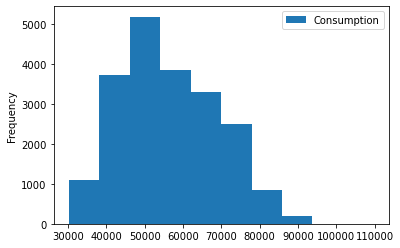

In [112]:
elct_df.plot(kind='hist')
#df.plot(kind='hist', bins= 30)

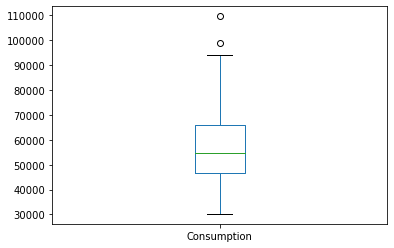

In [113]:
elct_df.plot(kind='box')

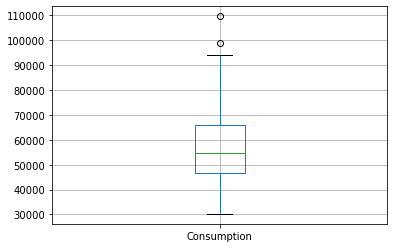

In [114]:
elct_df.boxplot()

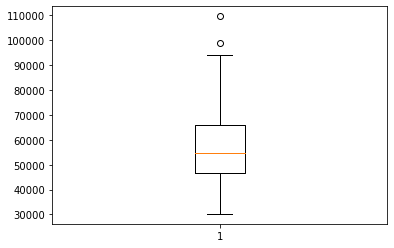

In [115]:
plt.boxplot(elct_df.dropna().Consumption)
plt.show()

We would like to understand the infromation given under the column date. Write codes to do the followings:
 - We'd like to only work on 2017 data. Check if the data is exclusively 2017. Only keep the data of 2017
 - Check if the dates are formatted in US or European 

In [116]:
date_df = elct_df.Date.str.split('/',expand=True)
date_df.columns = ['MD1','MD2','Year']
date_df.head()

,MD1,MD2,Year
0,12,1,2017
1,12,1,2017
2,12,1,2017
3,12,1,2017
4,12,1,2017


In [117]:
date_df.Year.unique()

array(['2017', '2018'], dtype=object)

In [118]:
BM = date_df.Year == '2017'

date_df = date_df[BM]
elct_df = elct_df[BM] #why?


In [119]:
date_df.Year.unique()

array(['2017'], dtype=object)

In [120]:
date_df.MD1.unique()

array(['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
      dtype=object)

In [121]:
date_df.MD2.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [122]:
date_df.columns = ['Month','Day','Year']
date_df.head()

,Month,Day,Year
0,12,1,2017
1,12,1,2017
2,12,1,2017
3,12,1,2017
4,12,1,2017


In [123]:
elct_df = elct_df.join(date_df)
elct_df.head()

,Date,time,Consumption,Month,Day,Year
0,12/1/2017,0:00:00,72650.0,12,1,2017
1,12/1/2017,0:15:00,72524.0,12,1,2017
2,12/1/2017,0:30:00,70553.0,12,1,2017
3,12/1/2017,0:45:00,69291.0,12,1,2017
4,12/1/2017,1:00:00,68277.0,12,1,2017


Add a column to the df that include the weekday. Hint: you will have to use some other modules. Find them, learn them, apply them. 

In [124]:
import datetime
def WeekDayRetrieve(row):
    Year = int(row['Year'])
    Month = int(row['Month'])
    Day = int(row['Day']) 
    TheDate = datetime.date(Year, Month, Day).weekday()
    if(TheDate==0):
        Weekday = 'Sun'
    if(TheDate==1):
        Weekday = 'Mon'
    if(TheDate==2):
        Weekday = 'Tue'
    if(TheDate==3):
        Weekday = 'Wed'
    if(TheDate==4):
        Weekday = 'Thu'
    if(TheDate==5):
        Weekday = 'Fri'
    if(TheDate==6):
        Weekday = 'Sat'

    return Weekday

In [125]:
WeekDaySerries = date_df.apply(WeekDayRetrieve, axis=1)
WeekDaySerries.head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
dtype: object

In [126]:
dfToJoin = pd.DataFrame(WeekDaySerries)
dfToJoin.columns = ['Weekday']
elct_df = elct_df.join(dfToJoin)

In [127]:
elct_df.head()

,Date,time,Consumption,Month,Day,Year,Weekday
0,12/1/2017,0:00:00,72650.0,12,1,2017,Thu
1,12/1/2017,0:15:00,72524.0,12,1,2017,Thu
2,12/1/2017,0:30:00,70553.0,12,1,2017,Thu
3,12/1/2017,0:45:00,69291.0,12,1,2017,Thu
4,12/1/2017,1:00:00,68277.0,12,1,2017,Thu


We would like to understand the infromation given under the column Time. Write codes to do the followings:
 - To understand the string structure of the information
 - To see if all of the given data is necessary
 - To create more codabality about all the possible given information 

In [128]:
time_df = elct_df.time.str.split(':', expand=True)
time_df.columns = ['Hour','Min','Sec']
time_df.head()

,Hour,Min,Sec
0,0,00,00
1,0,15,00
2,0,30,00
3,0,45,00
4,1,00,00


Let's check if having the three columns are necessary. 

In [129]:
print(time_df.Hour.unique())
print(time_df.Min.unique())
print(time_df.Sec.unique())

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23']
['00' '15' '30' '45']
['00']


In [130]:
time_df.drop(columns=['Sec'], inplace=True)
time_df.head()

,Hour,Min
0,0,00
1,0,15
2,0,30
3,0,45
4,1,00


In [131]:
elct_df = elct_df.join(time_df)
elct_df.head()

,Date,time,Consumption,Month,Day,Year,Weekday,Hour,Min
0,12/1/2017,0:00:00,72650.0,12,1,2017,Thu,0,00
1,12/1/2017,0:15:00,72524.0,12,1,2017,Thu,0,15
2,12/1/2017,0:30:00,70553.0,12,1,2017,Thu,0,30
3,12/1/2017,0:45:00,69291.0,12,1,2017,Thu,0,45
4,12/1/2017,1:00:00,68277.0,12,1,2017,Thu,1,00


In [132]:
elct_df['HourMin'] = elct_df.apply(lambda r: '{}:{}'.format(r.Hour,r.Min), axis=1)
elct_df.head()

,Date,time,Consumption,Month,Day,Year,Weekday,Hour,Min,HourMin
0,12/1/2017,0:00:00,72650.0,12,1,2017,Thu,0,00,0:00
1,12/1/2017,0:15:00,72524.0,12,1,2017,Thu,0,15,0:15
2,12/1/2017,0:30:00,70553.0,12,1,2017,Thu,0,30,0:30
3,12/1/2017,0:45:00,69291.0,12,1,2017,Thu,0,45,0:45
4,12/1/2017,1:00:00,68277.0,12,1,2017,Thu,1,00,1:00


Write a code that check if there are any missing values in the data. If there are, the code will report the number of missing values. Make this a function at the end.

In [133]:
def MissingValueReprots(df):
    print('The number of rows:', len(df))

    print('The number of Missing Values:', df.Consumption.isnull().astype(int).sum())

In [134]:
MissingValueReprots(elct_df)

The number of rows: 35040
The number of Missing Values: 16040


Draw some visualizations that invistigate if the Consumption missing values happen with specific patterns regarding the other columns of information.  


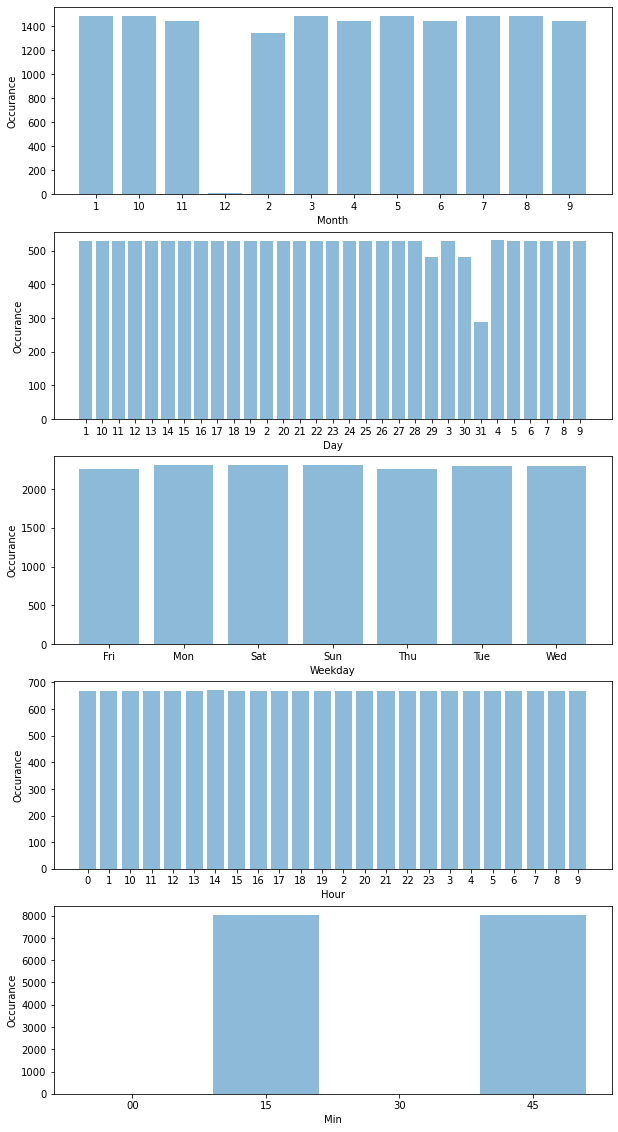

In [135]:
columns = ['Month', 'Day', 'Weekday', 'Hour', 'Min']

BM = elct_df.Consumption.isnull()
missing_df  = elct_df[BM]

plt.figure(figsize=(10,20))

for index, col in enumerate(columns):
    MsCounts = missing_df[col].value_counts()
    MsCounts = MsCounts.sort_index()
    
    plt.subplot(len(columns),1,index+1)
    plt.bar(MsCounts.index,MsCounts, align='center',alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Occurance')
    

The missing values are clearly MNAR as they are exclusively happening for 15 and 45 minutes. It shows the data collection has changed from every 15 minutes to every half an hour at some point.

In [136]:
BM = (elct_df.Min == '15') | (elct_df.Min == '45')

elct_df = elct_df[~BM]
elct_df = elct_df.reset_index().drop(columns=['index'])

Rechek the states of missing values:

In [137]:
MissingValueReprots(elct_df)

The number of rows: 17520
The number of Missing Values: 4


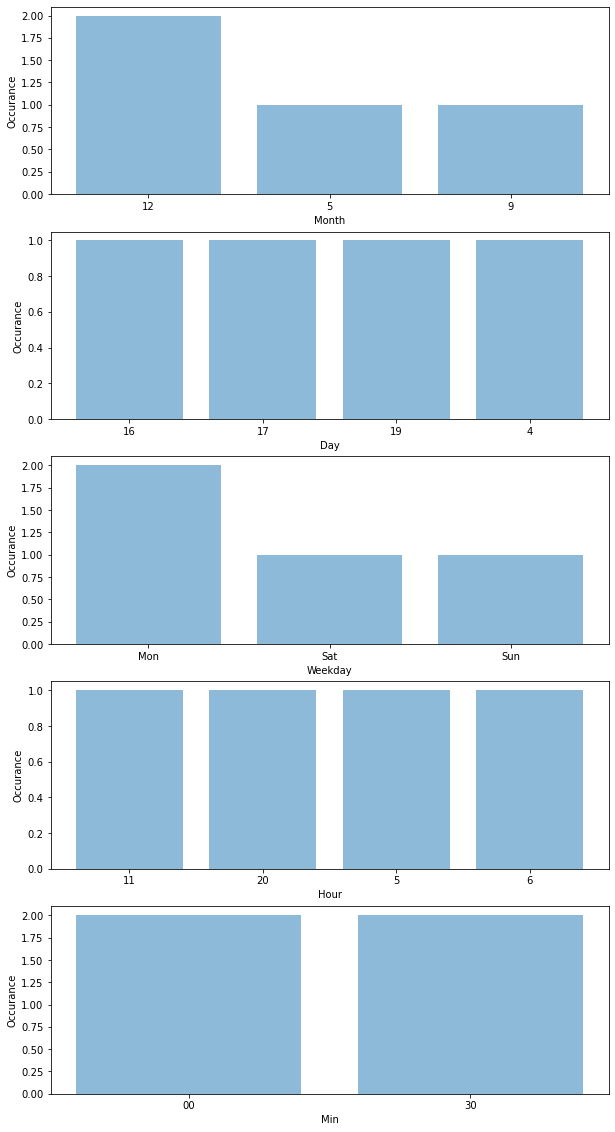

In [138]:
columns = ['Month', 'Day', 'Weekday', 'Hour', 'Min']

BM = elct_df.Consumption.isnull()
missing_df  = elct_df[BM]

plt.figure(figsize=(10,20))

for index, col in enumerate(columns):
    MsCounts = missing_df[col].value_counts()
    MsCounts = MsCounts.sort_index()
    
    plt.subplot(len(columns),1,index+1)
    plt.bar(MsCounts.index,MsCounts, align='center',alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Occurance')

The missing values are not showing any specific pattern in the data therefore we assume they are MCAR.

Draw line plots of 20 points after and before the missing values to get sense of their occurance.

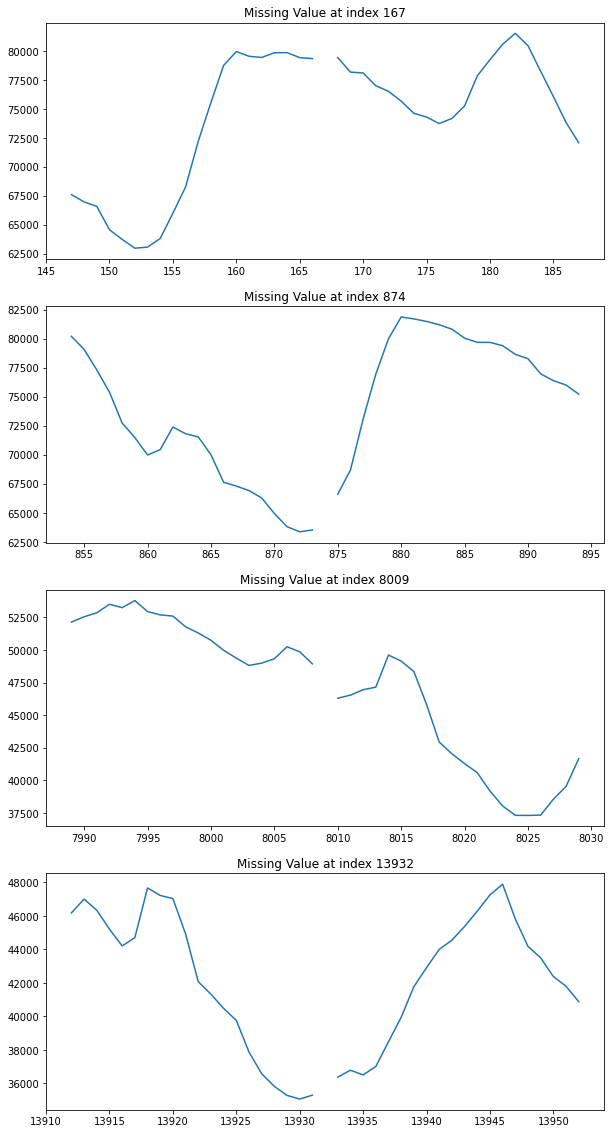

In [139]:
BM = elct_df.Consumption.isnull()
missing_df = elct_df[BM]

plt.figure(figsize=(10,20))

N_Miss = len(missing_df)

index = 0;
for i,row in missing_df.iterrows():
    index = index +1
    plt.subplot(N_Miss,1,index)
    plt.plot(elct_df.Consumption.loc[i-20:i+20])
    plt.title('Missing Value at index ' + str(i))
    

In [140]:
elct_df.Consumption = elct_df.Consumption.interpolate(method='linear')

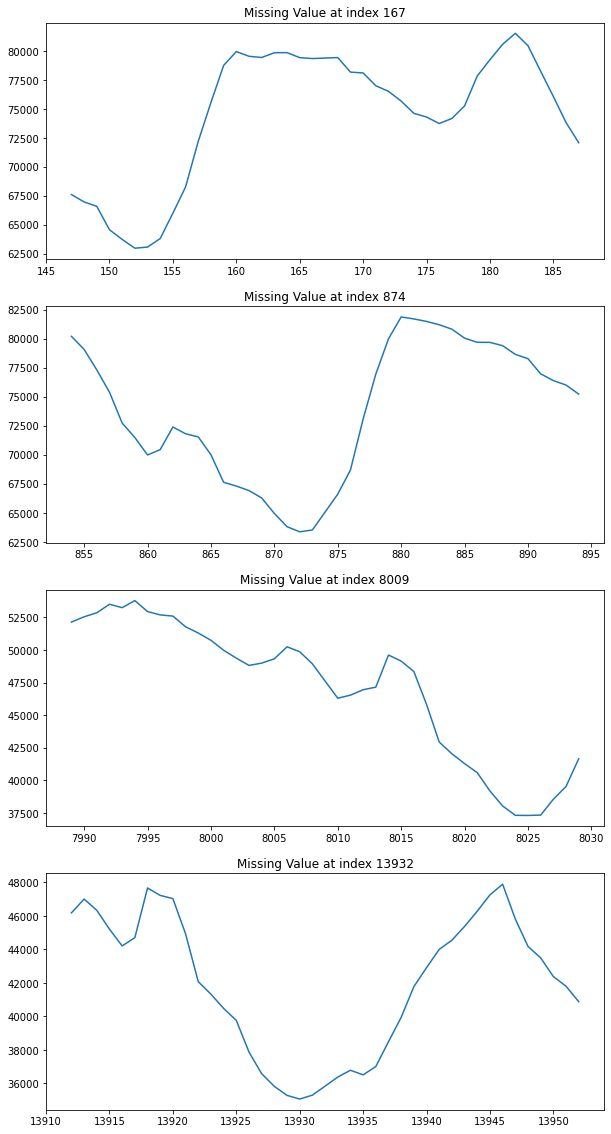

In [141]:
plt.figure(figsize=(10,20))

N_Miss = len(missing_df)

index = 0;
for i,row in missing_df.iterrows():
    index = index +1
    plt.subplot(N_Miss,1,index)
    plt.plot(elct_df.Consumption.loc[i-20:i+20])
    plt.title('Missing Value at index ' + str(i))

In [142]:
MissingValueReprots(elct_df)

The number of rows: 17520
The number of Missing Values: 0


In [143]:
elct_df.to_csv('Cleaned Electricity Data 2017.csv', index=False)